In [64]:
# Make plots interactive
%matplotlib notebook
# Import dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [2]:
# Load files into DataFrames
city_data_csv=os.path.join('Resources','city_data.csv')
ride_data_csv=os.path.join('Resources','ride_data.csv')
city_data_df=pd.read_csv(city_data_csv)
ride_data_df=pd.read_csv(ride_data_csv)

In [3]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# Count the number of cells in each column that aren't null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities
sum(city_data_df['type']=='Urban')
# sum(city_data_df['type']=='Suburban')
# sum(city_data_df['type']=='Rural')

66

In [9]:
# Count the number of cells in each column that aren't null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df,city_data_df,how='left',on=['city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# Create the Urban city DataFrame
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban'].copy()
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# Create the Suburban city DataFrame
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban'].copy()
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [14]:
# Create the Rural city DataFrame
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural'].copy()
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [15]:
# Get the number of rides for urban cities
urban_ride_count_s=urban_cities_df.groupby(['city'])['city'].count()
urban_ride_count_s.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: city, dtype: int64

In [16]:
# Get the number of rides for suburban cities
suburban_ride_count_s=suburban_cities_df.groupby(['city'])['city'].count()
suburban_ride_count_s.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: city, dtype: int64

In [17]:
# Get the number of rides for rural cities
rural_ride_count_s=rural_cities_df.groupby(['city'])['city'].count()
rural_ride_count_s.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: city, dtype: int64

In [18]:
# Get average fare for each city in the urban cities
urban_avg_fare_s=urban_cities_df.groupby(['city'])['fare'].mean()
urban_avg_fare_s.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [19]:
# Get average fare for each city in the suburban cities
suburban_avg_fare_s=suburban_cities_df.groupby(['city'])['fare'].mean()
suburban_avg_fare_s.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [20]:
# Get average fare for each city in the rural cities
rural_avg_fare_s=rural_cities_df.groupby(['city'])['fare'].mean()
rural_avg_fare_s.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [21]:
# Get the average number of drivers for each urban city
urban_driver_count_s=urban_cities_df.groupby(['city'])['driver_count'].mean()
urban_driver_count_s.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [22]:
# Get the average number of drivers for each suburban city
suburban_driver_count_s=suburban_cities_df.groupby(['city'])['driver_count'].mean()
suburban_driver_count_s.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [23]:
# Get the average number of drivers for each rural city
rural_driver_count_s=rural_cities_df.groupby(['city'])['driver_count'].mean()
rural_driver_count_s.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

<IPython.core.display.Javascript object>


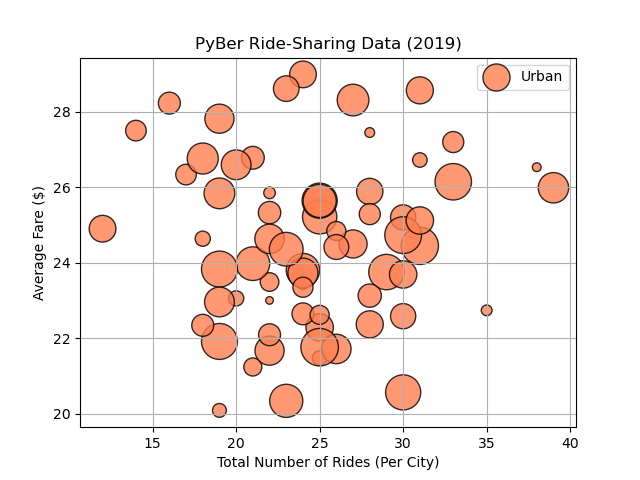

In [24]:
# Build the scatter plots for urban cities
urban_fig,ax=plt.subplots()
ax.scatter(urban_ride_count_s,urban_avg_fare_s,
           s=10*urban_driver_count_s,c='coral',edgecolor='k',linewidths=1,alpha=.8,label='Urban')
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.grid()
ax.legend()
urban_fig.show()

<IPython.core.display.Javascript object>


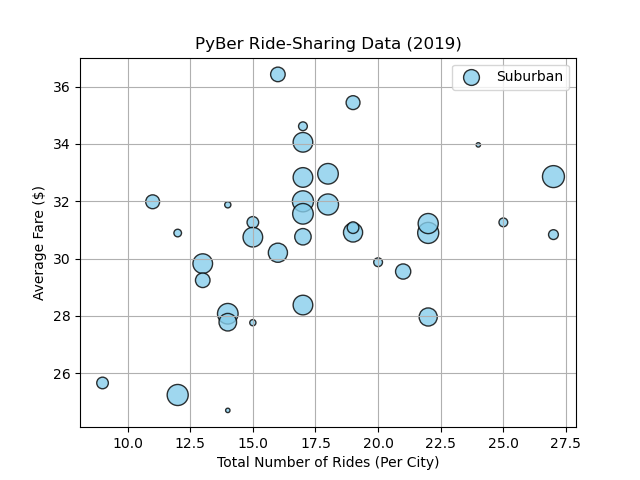

In [25]:
# Build the scatter plots for suburban cities
suburban_fig,ax=plt.subplots()
ax.scatter(suburban_ride_count_s,suburban_avg_fare_s,
           s=10*suburban_driver_count_s,c='skyblue',edgecolor='k',linewidths=1,alpha=.8,label='Suburban')
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.grid()
ax.legend()
suburban_fig.show()

<IPython.core.display.Javascript object>


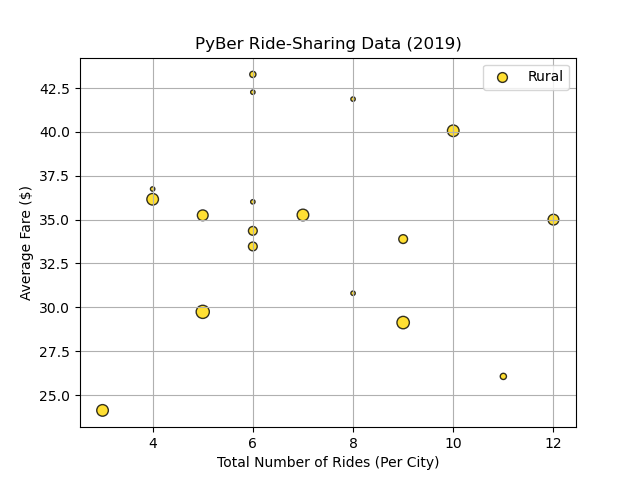

In [26]:
# Build the scatter plots for rural cities
rural_fig,ax=plt.subplots()
ax.scatter(rural_ride_count_s,rural_avg_fare_s,
           s=10*rural_driver_count_s,c='gold',edgecolor='k',linewidths=1,alpha=.8,label='Rural')
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.grid()
ax.legend()
rural_fig.show()

<IPython.core.display.Javascript object>


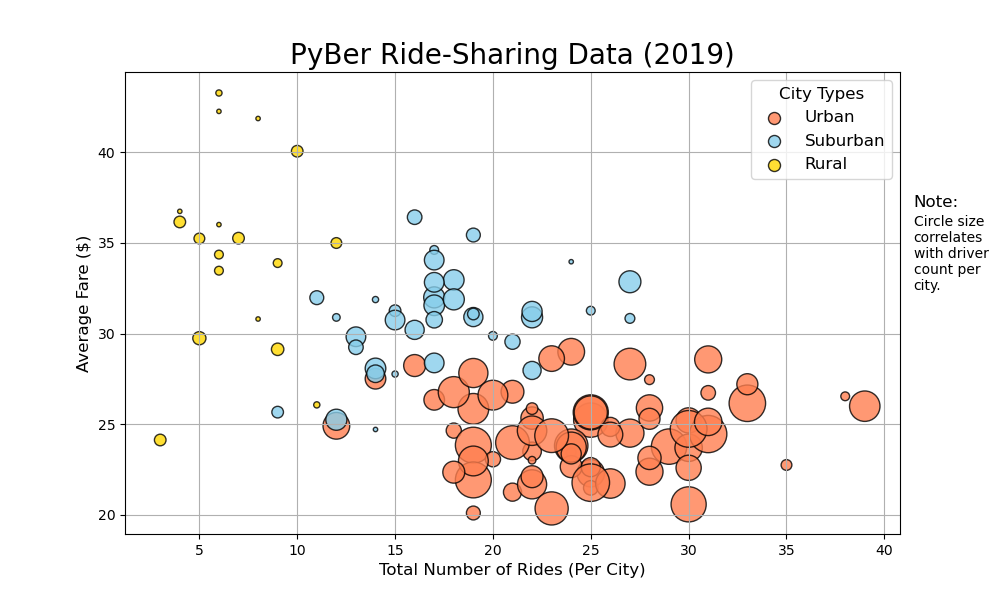

In [27]:
# Add the scatter charts for each type of city
city_data_fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(urban_ride_count_s,urban_avg_fare_s,
           s=10*urban_driver_count_s,c='coral',edgecolor='k',linewidths=1,alpha=.8,label='Urban')
ax.scatter(suburban_ride_count_s,suburban_avg_fare_s,
           s=10*suburban_driver_count_s,c='skyblue',edgecolor='k',linewidths=1,alpha=.8,label='Suburban')
ax.scatter(rural_ride_count_s,rural_avg_fare_s,
           s=10*rural_driver_count_s,c='gold',edgecolor='k',linewidths=1,alpha=.8,label='Rural')
ax.set_title('PyBer Ride-Sharing Data (2019)',fontsize=20)
ax.set_xlabel('Total Number of Rides (Per City)',fontsize=12)
ax.set_ylabel('Average Fare ($)',fontsize=12)
ax.grid()
lgnd=plt.legend(fontsize=12,mode='Expanded',scatterpoints=1,loc='best',title='City Types')
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)
ax.text(41.5,37,'Note:',fontsize=12)
ax.text(41.5,32.5,'Circle size correlates with driver count per city.',fontsize=10,wrap=True)
Fig1_png=os.path.join('Analysis','Fig1.png')
city_data_fig.savefig(Fig1_png)
city_data_fig.show()

In [28]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [29]:
# Get summary statistics
urban_ride_count_s.describe()
suburban_ride_count_s.describe()
rural_ride_count_s.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: city, dtype: float64

In [30]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count_s.mean(),2), round(suburban_ride_count_s.mean(),2), round(rural_ride_count_s.mean(),2)

(24.62, 17.36, 6.94)

In [31]:
# Calculate the median of the ride count for each city type
round(urban_ride_count_s.median(),2), round(suburban_ride_count_s.median(),2), round(rural_ride_count_s.median(),2)

(24.0, 17.0, 6.0)

In [32]:
# Calculate the mode of the ride count for the urban cities
urban_ride_count_s.mode()
suburban_ride_count_s.mode()

0    17
dtype: int64

In [33]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count=np.mean(urban_ride_count_s)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')
median_urban_ride_count=np.median(urban_ride_count_s)
print(f'The median for the ride counts for urban trips is {median_urban_ride_count}.')
mode_urban_ride_count=sts.mode(urban_ride_count_s)
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}.')

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [34]:
sts.mode(suburban_ride_count_s)
sts.mode(rural_ride_count_s)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [35]:
# Get the fares for the urban cities
urban_fares_s=urban_cities_df['fare'].copy()
urban_fares_s.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [36]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares_s=np.mean(urban_fares_s)
print(f'The mean fare price for urban trips is ${mean_urban_fares_s:.2f}.')
median_urban_fares_s=np.median(urban_fares_s)
print(f'The median fare price for urban trips is ${median_urban_fares_s:.2f}.')
mode_urban_fares_s=sts.mode(urban_fares_s)
print(f'The mode fare price for urban trips is {mode_urban_fares_s}.')

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [37]:
round(np.mean(urban_cities_df['fare']),2), round(np.mean(suburban_cities_df['fare']),2), round(np.mean(rural_cities_df['fare']),2)

(24.53, 30.97, 34.62)

In [38]:
# Get the driver count data from the urban cities
urban_drivers_s=urban_cities_df['driver_count'].copy()
urban_drivers_s.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [39]:
# Skill Drill 5.4.3
print(f'Urban driver count mean: {round(np.mean(urban_driver_count_s))} median: {np.median(urban_driver_count_s)} mode: {sts.mode(urban_driver_count_s)}')
print(f'Suburban driver count mean: {round(np.mean(suburban_driver_count_s))} median: {np.median(suburban_driver_count_s)} mode: {sts.mode(suburban_driver_count_s)}')
print(f'Rural driver count mean: {round(np.mean(rural_driver_count_s))} median: {np.median(rural_driver_count_s)} mode: {sts.mode(rural_driver_count_s)}')

Urban driver count mean: 36 median: 37.0 mode: ModeResult(mode=array([25.]), count=array([4]))
Suburban driver count mean: 14 median: 15.0 mode: ModeResult(mode=array([20.]), count=array([5]))
Rural driver count mean: 4 median: 4.0 mode: ModeResult(mode=array([1.]), count=array([5]))


<IPython.core.display.Javascript object>


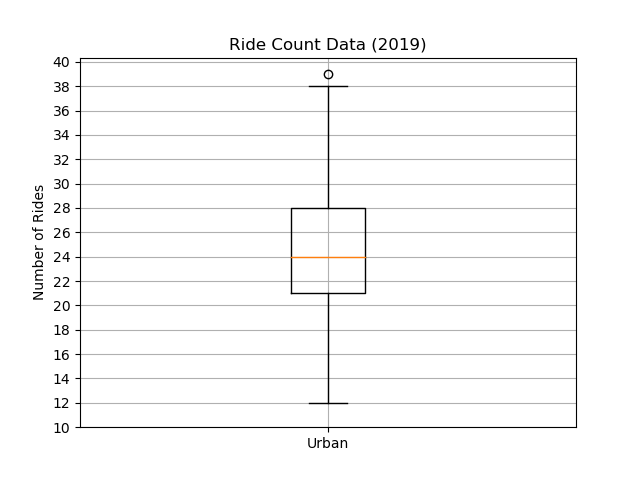

In [40]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels=['Urban']
urban_ride_count_fig,ax=plt.subplots()
ax.boxplot(urban_ride_count_s,labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41,step=2))
ax.grid()
urban_ride_count_fig.show()

<IPython.core.display.Javascript object>


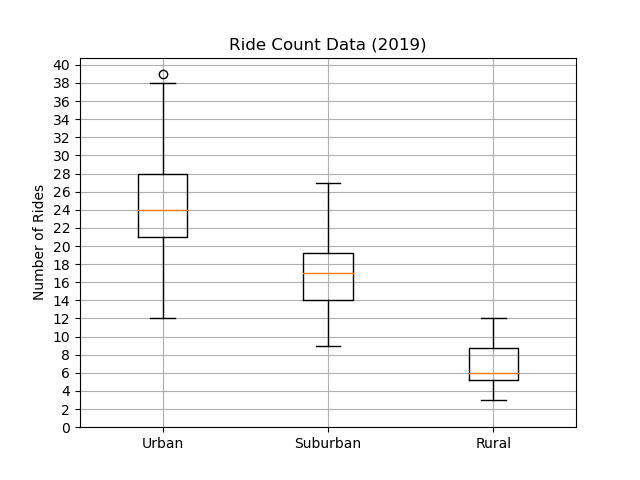

In [41]:
# Skill Drill 5.4.4
x_labels={'Urban':urban_ride_count_s,'Suburban':suburban_ride_count_s,'Rural':rural_ride_count_s}
all_ride_count_fig,ax=plt.subplots()
ax.boxplot(x_labels.values())
ax.set_title('Ride Count Data (2019)')
ax.set_xticklabels(x_labels.keys())
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 41,step=2))
ax.grid()
all_ride_count_fig.show()

<IPython.core.display.Javascript object>


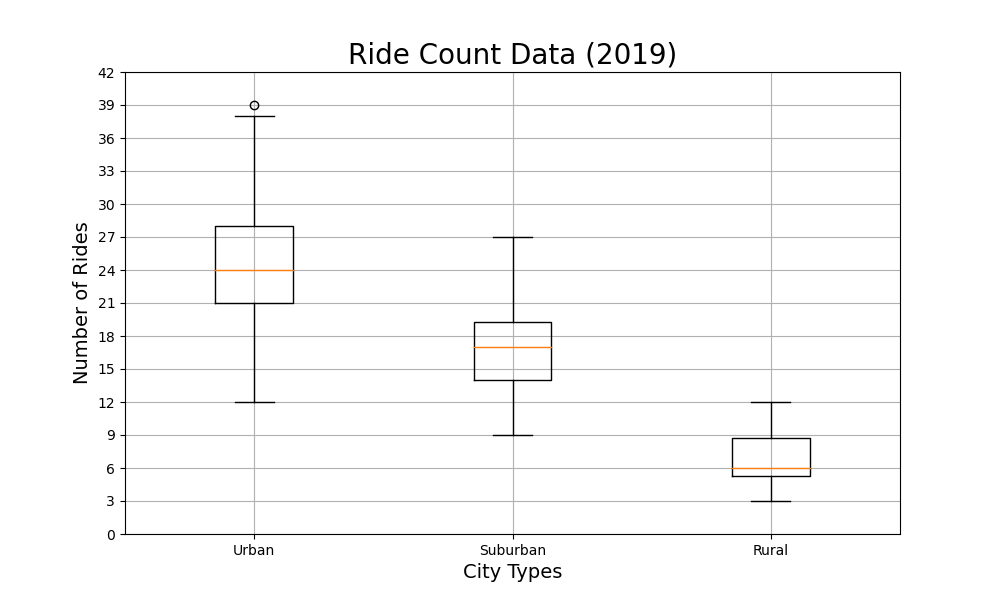

In [42]:
# Add all ride count box-and-whisker plots to the same graph
x_labels={'Urban':urban_ride_count_s,'Suburban':suburban_ride_count_s,'Rural':rural_ride_count_s}
all_ride_count_fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(x_labels.values(),labels=x_labels.keys())
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_xlabel('City Types',fontsize=14)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_yticks(np.arange(0, 45,step=3))
ax.grid()
Fig2_png=os.path.join('Analysis','Fig2.png')
all_ride_count_fig.savefig(Fig2_png)
all_ride_count_fig.show()

In [43]:
# Get the city that matches 39
urban_city_outlier=urban_ride_count_s[urban_ride_count_s==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


<IPython.core.display.Javascript object>


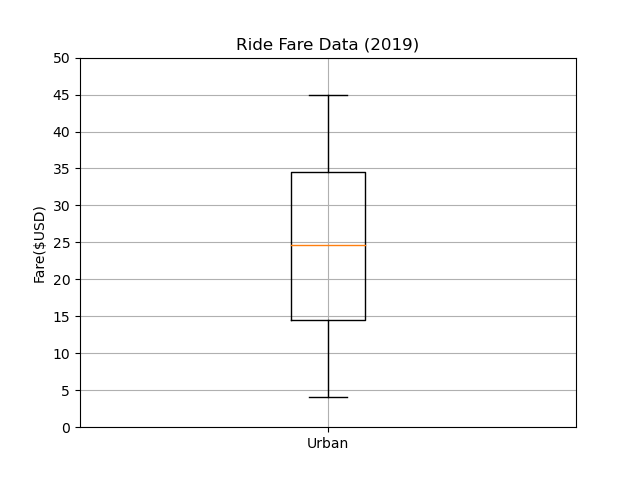

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [44]:
# Create a box-and-whisker plot for the urban fare data
x_labels=['Urban']
urban_fare_fig,ax=plt.subplots()
ax.boxplot(urban_fares_s,labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51,step=5))
ax.grid()
urban_fare_fig.show()
print('Summary Statistics')
urban_fares_s.describe()

<IPython.core.display.Javascript object>


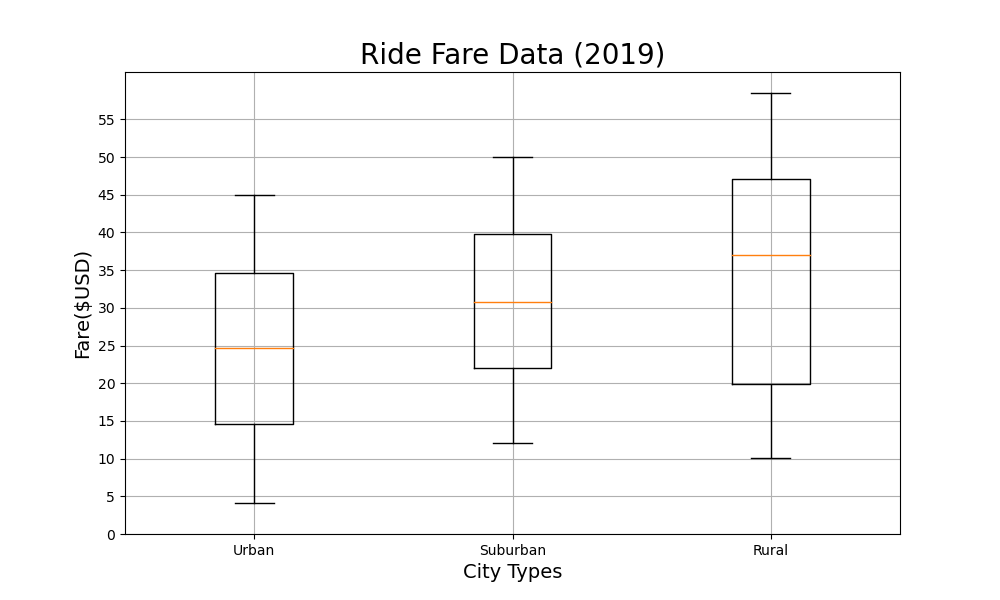

In [45]:
# Skill Drill 5.4.4
suburban_fares_s=suburban_cities_df['fare'].copy()
rural_fares_s=rural_cities_df['fare'].copy()
x_labels={'Urban':urban_fares_s,'Suburban':suburban_fares_s,'Rural':rural_fares_s}
all_fares_fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(x_labels.values(),labels=x_labels.keys())
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_xlabel('City Types',fontsize=14)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_yticks(np.arange(0, 56,step=5))
ax.grid()
Fig3_png=os.path.join('Analysis','Fig3.png')
all_fares_fig.savefig(Fig3_png)
all_fares_fig.show()

<IPython.core.display.Javascript object>


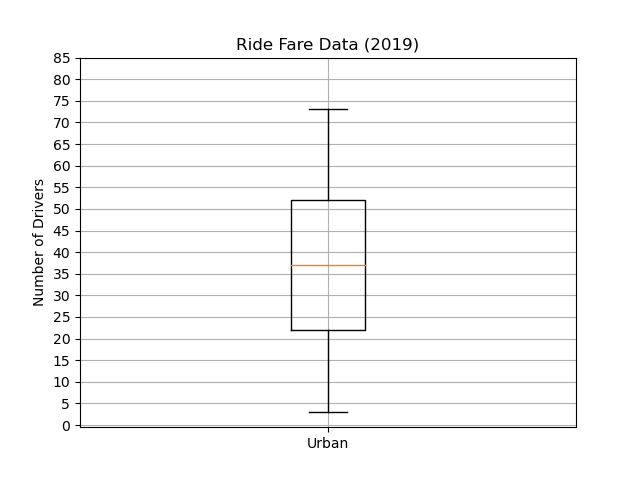

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [46]:
# Create the box-and-whisker plot for the urban driver count data
x_labels=['Urban']
urban_driver_count_fig,ax=plt.subplots()
ax.boxplot(urban_drivers_s,labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90,step=5))
ax.grid()
urban_driver_count_fig.show()
print('Summary Statistics')
urban_drivers_s.describe()

<IPython.core.display.Javascript object>


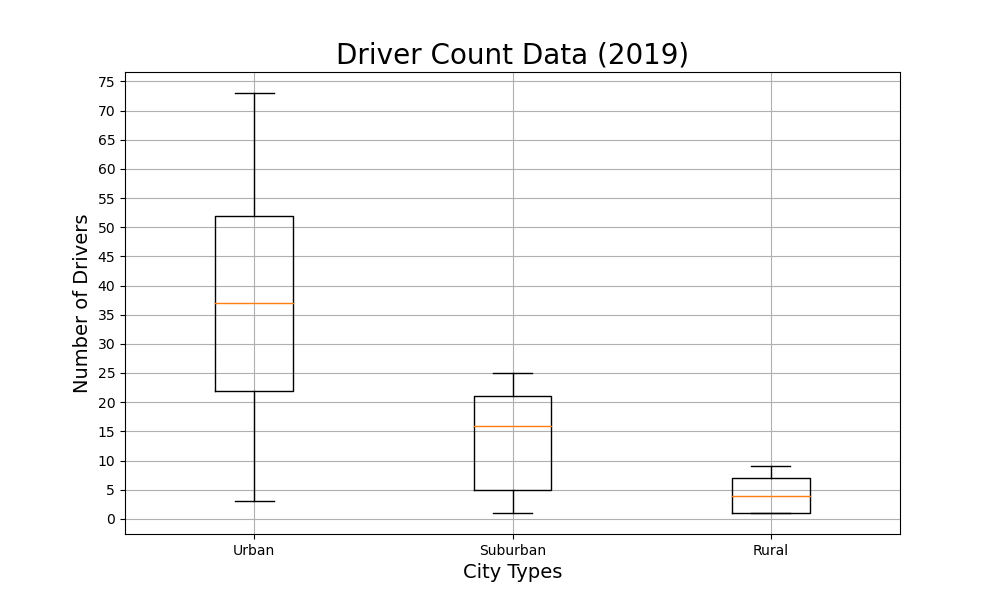

In [47]:
# Skill Drill 5.4.4
suburban_drivers_s=suburban_cities_df['driver_count'].copy()
rural_drivers_s=rural_cities_df['driver_count'].copy()
x_labels={'Urban':urban_drivers_s,'Suburban':suburban_drivers_s,'Rural':rural_drivers_s}
all_driver_count_fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(x_labels.values(),labels=x_labels.keys())
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_xlabel('City Types',fontsize=14)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_yticks(np.arange(0, 76,step=5))
ax.grid()
Fig4_png=os.path.join('Analysis','Fig4.png')
all_driver_count_fig.savefig(Fig4_png)
all_driver_count_fig.show()

In [56]:
# Get the sum of the fares for each city type
sum_fares_by_type_s=pyber_data_df.groupby(['type'])['fare'].sum()
sum_fares_by_type_s

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [57]:
# Get the sum of all the fares
total_fares=pyber_data_df['fare'].sum()
total_fares

63538.64

In [59]:
# Calculate the percentage of fare for each city type
type_percents=sum_fares_by_type_s/total_fares*100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [60]:
# Calculate the percentage of fare for each city type
type_percents=pyber_data_df.groupby(['type'])['fare'].sum()/pyber_data_df['fare'].sum()*100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

<IPython.core.display.Javascript object>


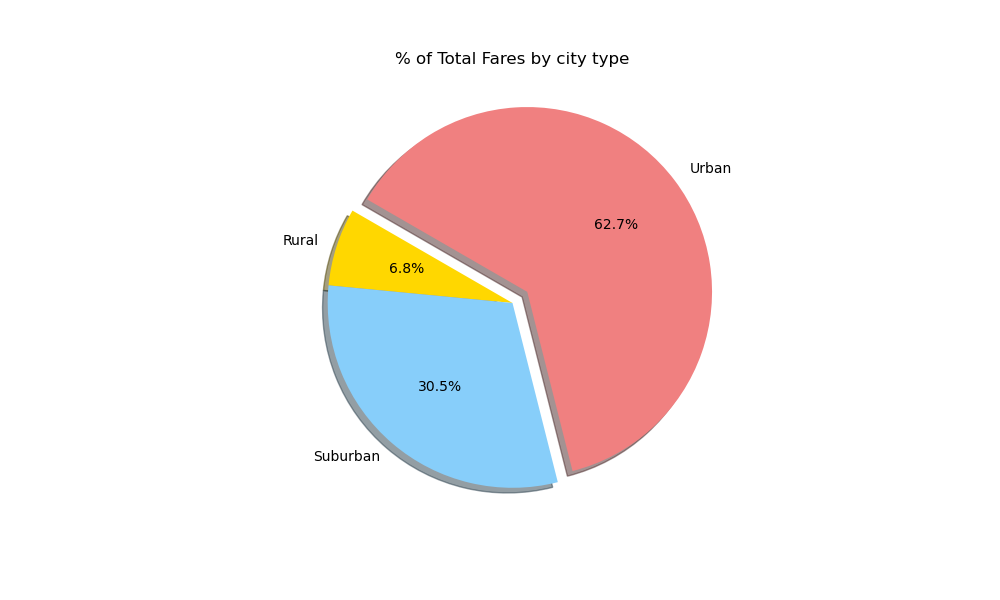

In [65]:
# Build the percentage of fares by city type pie chart
fares_by_city_fig,ax=plt.subplots(figsize=(10,6))
ax.pie(type_percents,labels=['Rural','Suburban','Urban'],
      colors=['gold','lightskyblue','lightcoral'],explode=[0, 0, .1],autopct='%1.1f%%',shadow=True,startangle=150)
ax.set_title('% of Total Fares by city type')
# Change the default font size from 10 to 14
mpl.rcParams['font.size']=14
Fig5_png=os.path.join('Analysis','Fig5.png')
fares_by_city_fig.savefig(Fig5_png)
fares_by_city_fig.show()